# Basic Tweet Classifier
- Text Preprocessing
- Tokenization
- Stemming
- Bag Of Words
- Feature transformation (Naive Bayes)
- Logistic Regression Model

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

In [120]:
path = r'F:\Muthu_2023\Personal\NextStep\NLP\NLP\Dataset\CoronaTweets'
raw_train = pd.read_csv(path + r'\Corona_NLP_train.csv', encoding = 'latin')
raw_test = pd.read_csv(path + r'\Corona_NLP_test.csv', encoding = 'latin')

In [260]:
train = raw_train[raw_train['Sentiment'].isin(['Positive', 'Negative'])].copy()
test = raw_test[raw_test['Sentiment'].isin(['Positive', 'Negative'])].copy()

`Considering only Positive and Negative Sentiment`

# Data Exploration

In [123]:
raw_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


In [124]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21339 entries, 1 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       21339 non-null  int64 
 1   ScreenName     21339 non-null  int64 
 2   Location       16873 non-null  object
 3   TweetAt        21339 non-null  object
 4   OriginalTweet  21339 non-null  object
 5   Sentiment      21339 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

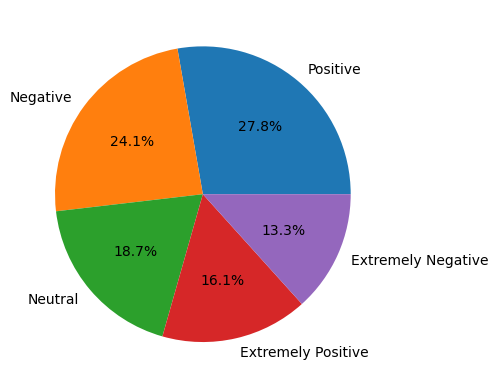

In [125]:
plt.pie(raw_train['Sentiment'].value_counts(), labels =raw_train['Sentiment'].value_counts().index, autopct ='%0.1f%%');
raw_train['Sentiment'].value_counts()

`Due to imbalance in the dataset, for this notebook considering only the Positive and Negative Sentiments`

In [27]:
raw_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [28]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


Sentiment
Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: count, dtype: int64

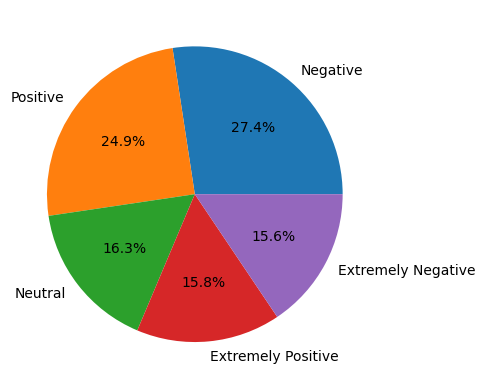

In [126]:
plt.pie(raw_test['Sentiment'].value_counts(), labels =raw_test['Sentiment'].value_counts().index, autopct ='%0.1f%%');
raw_test['Sentiment'].value_counts()

In [128]:
train['Sentiment'].value_counts()

Sentiment
Positive    11422
Negative     9917
Name: count, dtype: int64

In [129]:
test['Sentiment'].value_counts()

Sentiment
Negative    1041
Positive     947
Name: count, dtype: int64

# Text Preprocessing on Randomly selected Tweet

In [255]:
rand_text = train_pos['OriginalTweet'].iloc[15]
rand_text

"Dear Coronavirus, \r\r\nI've been following social distancing rules and staying home to prevent the spread of you.  However, now I've spent an alarming amount of money shopping online.  Where can I submit my expenses to for reimbursement? Let me know.\r\r\n#coronapocolypse #coronavirus"

In [57]:
p1_text = word_tokenize(rand_text)

In [36]:
# Remove punctuation and stop words
punc = '[{}]-+=;:|\<,>.?/!@#$%^&*()_\"\''
sw = stopwords.words('english')

In [74]:
p2_text = []
pat = '[\']' # To remove words with symbol '
for word in p1_text:
    if word.lower() not in string.punctuation and word.lower() not in sw and not re.search(pat, word.lower()):
        p2_text.append(word.lower())
p2_text

['dear',
 'coronavirus',
 'following',
 'social',
 'distancing',
 'rules',
 'staying',
 'home',
 'prevent',
 'spread',
 'however',
 'spent',
 'alarming',
 'amount',
 'money',
 'shopping',
 'online',
 'submit',
 'expenses',
 'reimbursement',
 'let',
 'know',
 'coronapocolypse',
 'coronavirus']

`Punctuations, Stop words and words containing '' are removed `

## Stemming and Lemmatizing

In [258]:
stemmer = PorterStemmer()
stem_text = []
for word in p2_text:
    stem_text.append(stemmer.stem(word))
print(stem_text)

['dear', 'coronaviru', 'follow', 'social', 'distanc', 'rule', 'stay', 'home', 'prevent', 'spread', 'howev', 'spent', 'alarm', 'amount', 'money', 'shop', 'onlin', 'submit', 'expens', 'reimburs', 'let', 'know', 'coronapocolyps', 'coronaviru']


In [259]:
lemma = WordNetLemmatizer()
lemma_text = []
for word in p2_text:
    lemma_text.append(lemma.lemmatize(word, pos = 'v'))
print(lemma_text)

['dear', 'coronavirus', 'follow', 'social', 'distance', 'rule', 'stay', 'home', 'prevent', 'spread', 'however', 'spend', 'alarm', 'amount', 'money', 'shop', 'online', 'submit', 'expense', 'reimbursement', 'let', 'know', 'coronapocolypse', 'coronavirus']


In [147]:
tweet = 'Consumers have increased their online shopping due to coronavirus. https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT'

In [151]:
def preprocess_text(tweet_text):
    tweet_text = re.sub(r'https://[^\s\n\r]+', '', tweet_text) #Remove links
    tweet_text = re.sub(r'http://[^\s\n\r]+', '', tweet_text)
    token = word_tokenize(tweet_text)
    sw = stopwords.words('english')
    stemmer = PorterStemmer()
    pat = '[\']' # To remove words with symbol '
    clean_words = []
    for word in token:
        if word.lower() not in string.punctuation and word.lower() not in sw and not re.search(pat, word.lower()):
            clean_words.append(stemmer.stem(word))
    return clean_words

In [152]:
train['tokenized'] = train['OriginalTweet'].apply(preprocess_text)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11168\1773124524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['tokenized'] = train['OriginalTweet'].apply(preprocess_text)


# Unique Words Extraction

In [153]:
token_exp = train[['tokenized', 'Sentiment']].explode('tokenized')

In [266]:
n_unique = token_exp['tokenized'].nunique()
uni_neg = token_exp[token_exp['Sentiment'] == 'Negative']['tokenized'].unique()
n_uni_neg = token_exp[token_exp['Sentiment'] == 'Negative']['tokenized'].nunique()
uni_pos = token_exp[token_exp['Sentiment'] == 'Positive']['tokenized'].unique()
n_uni_pos = token_exp[token_exp['Sentiment'] == 'Positive']['tokenized'].nunique()
print('No. of unique words:', n_unique)
print('No. of unique words in Positive Sentiment:', n_uni_pos, str(n_uni_pos * 100//n_unique) + '%')
print('No. of unique words in Negative Sentiment:', n_uni_neg, str(n_uni_neg * 100//n_unique) + '%')
print('No. of words in common: ', (n_uni_neg + n_uni_pos) - n_unique, str(((n_uni_neg + n_uni_pos) - n_unique) * 100//n_unique) + '%')

No. of unique words: 33739
No. of unique words in Positive Sentiment: 22601 66%
No. of unique words in Negative Sentiment: 20099 59%
No. of words in common:  8961 26%


In [261]:
print(token_exp[token_exp['Sentiment'] == 'Negative']['tokenized'].value_counts()[:20])

tokenized
coronaviru     4322
price          2740
food           2056
covid-19       1952
supermarket    1948
store          1849
groceri        1528
peopl          1429
amp            1132
consum         1102
19             1094
shop           1077
go             1061
covid19        1015
covid           995
demand          911
buy             909
get             896
pandem          826
panic           824
Name: count, dtype: int64


`Top 20 Unique Words in Negative Sentiment`

In [159]:
token_exp[token_exp['Sentiment'] == 'Positive']['tokenized'].value_counts()[:20]

tokenized
coronaviru     4848
store          2431
price          2286
covid-19       2172
supermarket    2112
groceri        2103
food           1852
consum         1511
shop           1495
amp            1493
covid19        1470
peopl          1449
19             1247
covid          1158
go             1148
get            1087
onlin          1082
need           1060
sanit          1036
hand           1029
Name: count, dtype: int64

`Top 20 Unique Words in Positive Sentiment`

In [268]:
def CreateWordFreq(token_exp):
    freq_pos = token_exp[token_exp['Sentiment'] == 'Positive']['tokenized'].value_counts().to_dict()
    freq_neg = token_exp[token_exp['Sentiment'] == 'Negative']['tokenized'].value_counts().to_dict()

    word_freq = {}
    for word in token_exp['tokenized'].unique():
        if word in freq_pos:
            pos = freq_pos[word]
        else:
            pos = 0

        if word in freq_neg:
            neg = freq_neg[word]
        else:
            neg = 0

        word_freq[word] = [pos, neg]
    return word_freq

- `freq_pos: Dictionary contain frequency of words present in Positive Sentiment tweets`
- `freq_neg: Dictionary contain frequency of words present in Negative Sentiment tweets`
- `Merge freq_pos and freq_neg, to single dictionary with positive and negative frequency as list values in word_freq`

In [249]:
def Extract_Feature_Vector(tweet_text):
    temp_vec = np.zeros(3)
    for word in tweet_text:
        if word in word_freq:
            temp_vec[1] += word_freq[word][0]
            temp_vec[2] += word_freq[word][1]
    return temp_vec

# Data Preparation

In [270]:
train['tokenized'] = train['OriginalTweet'].apply(preprocess_text)
token_exp = train[['tokenized', 'Sentiment']].explode('tokenized')
word_freq = CreateWordFreq(token_exp)

## Preparation of Training data

In [271]:
train['feature_vec'] = train['tokenized'].apply(Extract_Feature_Vector)

In [272]:
train['Bias'] = train['feature_vec'].apply(lambda x: x[0])
train['PosW'] = train['feature_vec'].apply(lambda x: x[1])
train['NegW'] = train['feature_vec'].apply(lambda x: x[2])
train['Target'] = train['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

In [273]:
train_data = train[['Bias', 'PosW', 'NegW', 'Target']]
train_data

,Bias,PosW,NegW,Target
1,0.0,5072.0,3836.0,1
2,0.0,9837.0,8538.0,1
3,0.0,17413.0,15764.0,1
5,0.0,13920.0,11363.0,1
6,0.0,6761.0,5302.0,1
...,...,...,...,...
41147,0.0,7951.0,6631.0,0
41149,0.0,10618.0,9045.0,0
41150,0.0,11975.0,10029.0,1
41154,0.0,9475.0,7737.0,1


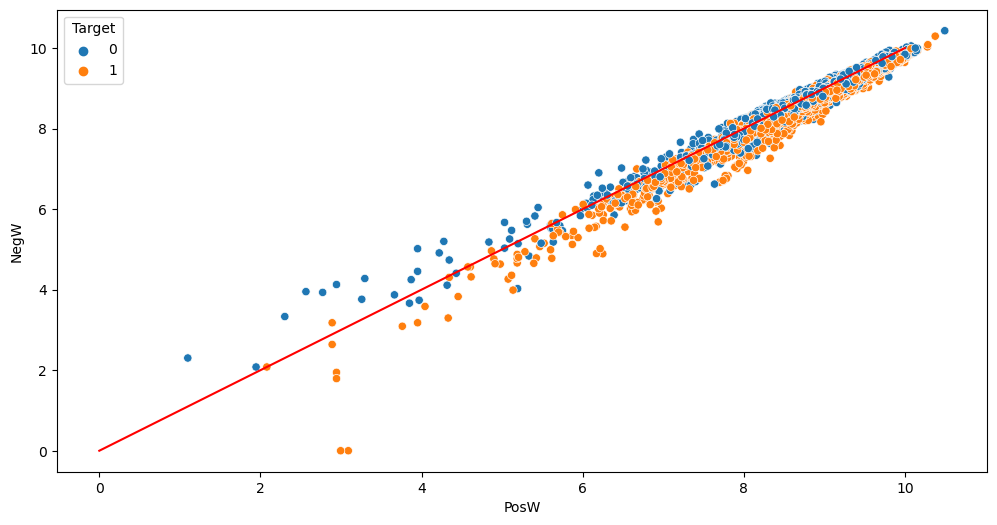

In [275]:
plt.figure(figsize=(12,6))
x = np.log(train_data['PosW'] + 1)
y = np.log(train_data['NegW'] + 1)
x1 = np.arange(0, max(x))
sns.scatterplot(x = x, y = y, hue=train_data['Target'], data=None)
plt.plot(x1, x1, color='r')

`Orange dots represents positive sentiment and Bl`

(7.0, 10.0)

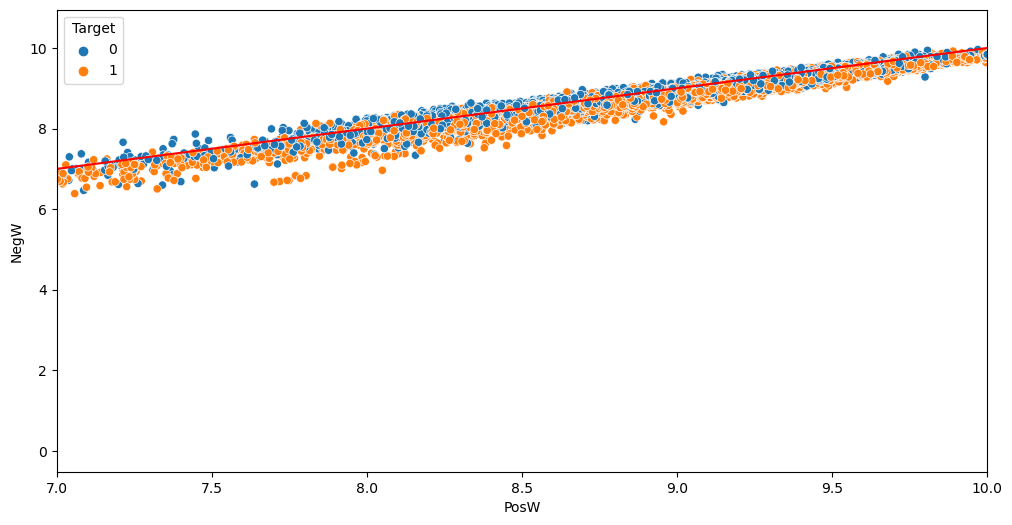

In [276]:
plt.figure(figsize=(12,6))
x = np.log(train_data['PosW'] + 1)
y = np.log(train_data['NegW'] + 1)
x1 = np.arange(0, max(x))
sns.scatterplot(x = x, y = y, hue=train_data['Target'], data=None)
plt.plot(x1, x1, color='r')
plt.xlim(7,10)

## Preparation of Test Data

In [277]:
test['tokenized'] = test['OriginalTweet'].apply(preprocess_text)
test['feature_vec'] = test['tokenized'].apply(Extract_Feature_Vector)
test['Bias'] = test['feature_vec'].apply(lambda x: x[0])
test['PosW'] = test['feature_vec'].apply(lambda x: x[1])
test['NegW'] = test['feature_vec'].apply(lambda x: x[2])
test['Target'] = test['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)
test_data = test[['Bias', 'PosW', 'NegW', 'Target']]
test_data

,Bias,PosW,NegW,Target
1,0.0,11023.0,9188.0,1
3,0.0,12395.0,12096.0,0
6,0.0,6975.0,5041.0,1
10,0.0,4093.0,4294.0,1
14,0.0,5588.0,4623.0,1
...,...,...,...,...
3784,0.0,11935.0,10393.0,1
3790,0.0,3212.0,2457.0,1
3792,0.0,1238.0,942.0,0
3793,0.0,9366.0,8185.0,1


# Model Preparation

## Logistic Regression

In [278]:
from sklearn.linear_model import LogisticRegression

In [279]:
logr = LogisticRegression()

In [281]:
X = train_data[['Bias', 'PosW', 'NegW']]
Y = train_data['Target']
logr.fit(X, Y)

In [282]:
print('Training Accuracy: ', logr.score(X, Y))

Training Accuracy:  0.6289891747504569


In [283]:
X = test_data[['Bias', 'PosW', 'NegW']]
Y = test_data['Target']
print('Testing Accuracy: ', logr.score(X, Y))

Testing Accuracy:  0.5774647887323944
